# Exploratory Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from diabetes.data import read_data, health_check
from diabetes.visualisation import value_counts

In [2]:
df = read_data()

Data ingestion complete, with dataframe head:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
health_check(df)

Total null fields per column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
------------------------------
Total duplicated rows: 0
------------------------------
Here are the data types:
Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Univariate analysis
## Target Variable

In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


The values within this Outcome are : 
Outcome
0    1816
1     952
Name: count, dtype: int64
------------------------------


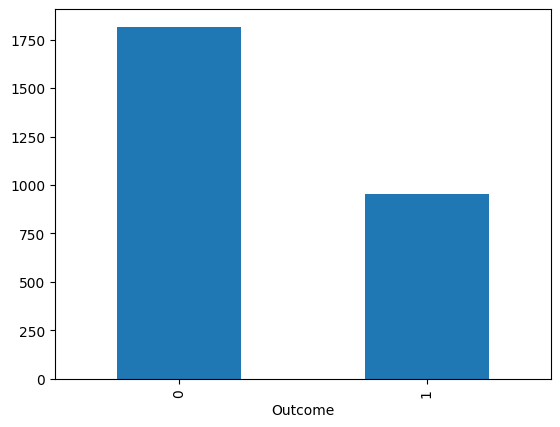

In [5]:
value_counts(df, "Outcome")

Data is unbalanced with roughly 66% to 0 and 33% to 1 (the person has diabetes)

## Skewness

In [6]:
# Calculate skewness for all numerical columns
skewness_scores = df.select_dtypes(include=['number']).skew().sort_values(ascending=False)
print(skewness_scores)

Insulin                     2.078111
DiabetesPedigreeFunction    1.842791
Age                         1.166299
Pregnancies                 0.959096
Outcome                     0.657465
SkinThickness               0.180841
Glucose                     0.162864
Id                          0.000000
BMI                        -0.176576
BloodPressure              -1.850450
dtype: float64


How to interpret the score:
- 1> or <−1: Highly skewed (Likely needs transformation).
- 0.5 to 1 (or −0.5 to −1): Moderately skewed.
- −0.5 to 0.5: Symmetrical (Normal enough for most models).

Check BloodPressure, Age, DiabetesPedigreeFunction, Insulin

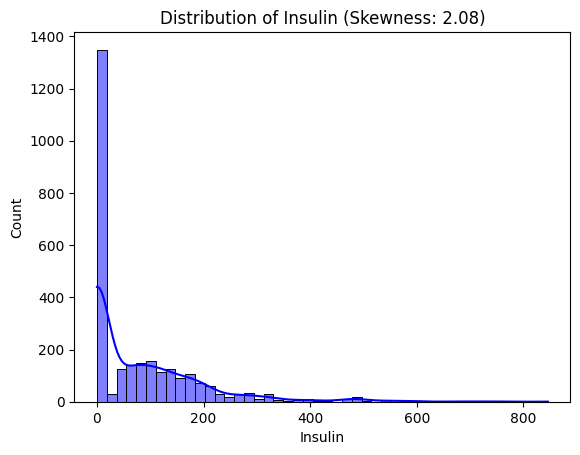

In [7]:
# plotting a highly skewed variable 'Insulin'
sns.histplot(df['Insulin'], kde=True, color='blue')
plt.title(f"Distribution of Insulin (Skewness: {df['Insulin'].skew():.2f})")
plt.show()

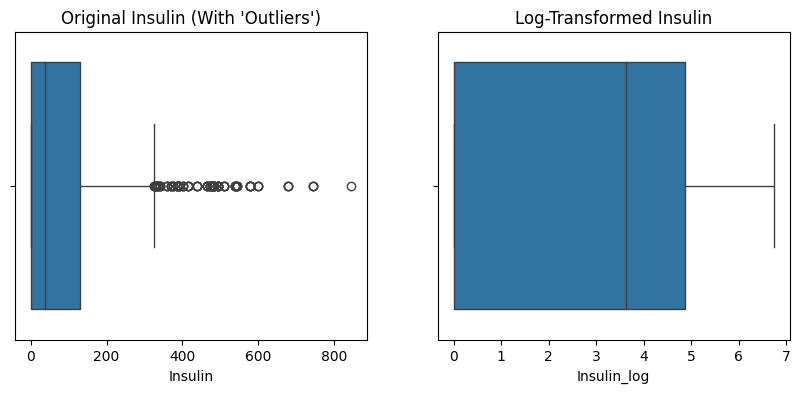

In [ ]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Insulin'])
plt.title("Original Insulin (With 'Outliers')")

# log Transform (using log1p to handle zeros)
df['Insulin_log'] = np.log1p(df['Insulin'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Insulin_log'])
plt.title("Log-Transformed Insulin")
plt.show()

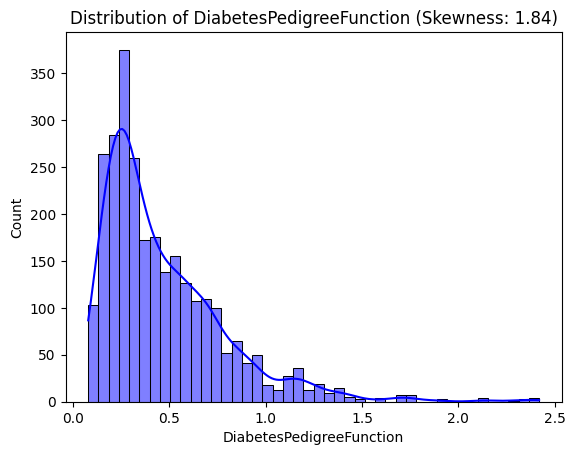

In [9]:
# plotting a highly skewed variable 'DiabetesPedigreeFunction'
sns.histplot(df['DiabetesPedigreeFunction'], kde=True, color='blue')
plt.title(f"Distribution of DiabetesPedigreeFunction (Skewness: {df['DiabetesPedigreeFunction'].skew():.2f})")
plt.show()

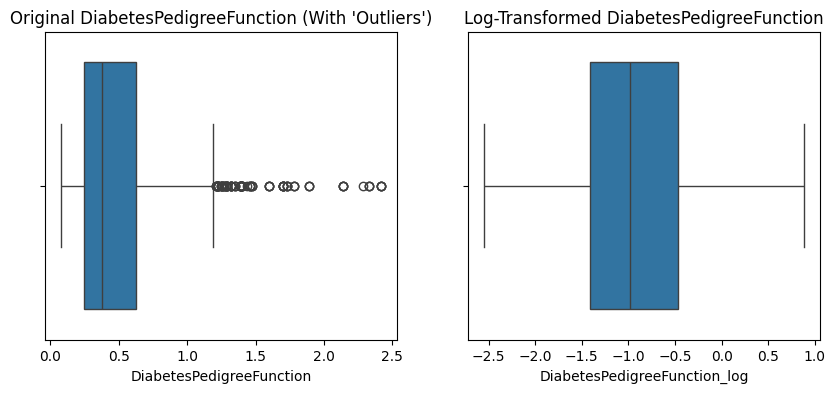

In [11]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title("Original DiabetesPedigreeFunction (With 'Outliers')")

# log Transform (using logp since no zeros)
df['DiabetesPedigreeFunction_log'] = np.log(df['DiabetesPedigreeFunction'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['DiabetesPedigreeFunction_log'])
plt.title("Log-Transformed DiabetesPedigreeFunction")
plt.show()

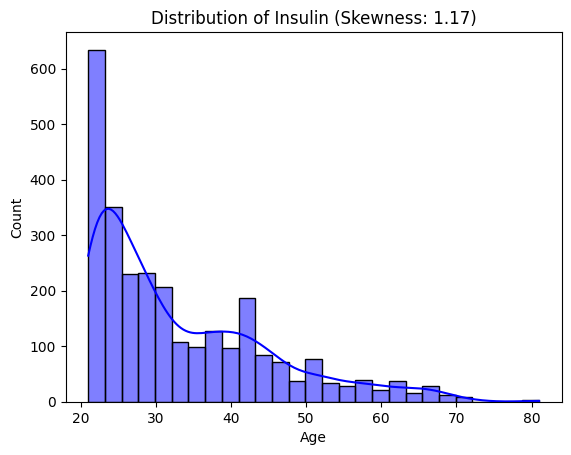

In [12]:
# plotting a highly skewed variable 'Age'
sns.histplot(df['Age'], kde=True, color='blue')
plt.title(f"Distribution of Insulin (Skewness: {df['Age'].skew():.2f})")
plt.show()

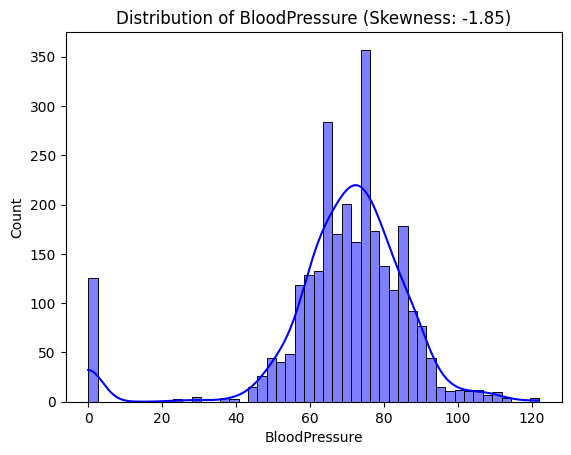

In [14]:
# plotting a highly skewed variable 'BloodPressure'
sns.histplot(df['BloodPressure'], kde=True, color='blue')
plt.title(f"Distribution of BloodPressure (Skewness: {df['BloodPressure'].skew():.2f})")
plt.show()

/Users/sajidahmed/Desktop/VS Code/diabetes/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


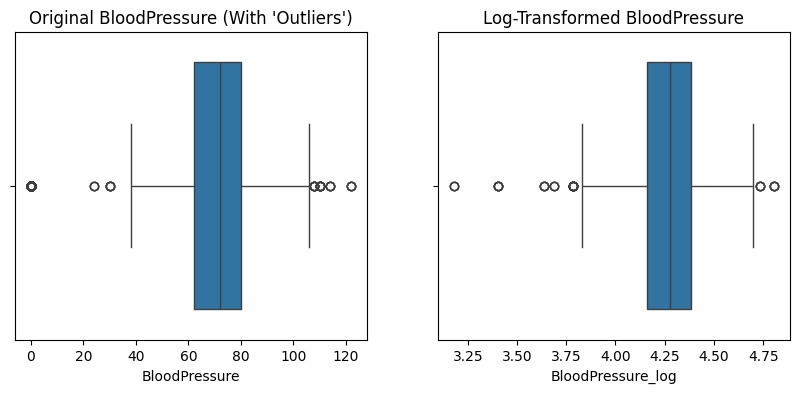

In [15]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BloodPressure'])
plt.title("Original BloodPressure (With 'Outliers')")

# log Transform (using logp since no zeros)
df['BloodPressure_log'] = np.log(df['BloodPressure'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['BloodPressure_log'])
plt.title("Log-Transformed BloodPressure")
plt.show()

TODO: Write why log won't happen and what the plan of action would be.